In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [2]:
#!pip install nltk
#!pip install seaborn
#!pip install textblob
#!pip install xgboost

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  3976 non-null   object
 1   Response  3969 non-null   object
 2   target    3976 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 93.3+ KB


In [5]:
df.isnull().sum()

Question    0
Response    7
target      0
dtype: int64

In [6]:
df[df['Response'].isnull()]

,Question,Response,target
196,Can you provide a guide to starting a meditati...,NaN,6
339,How do you manage to keep information concise ...,NaN,1
401,What safeguards are in place to prevent misuse...,NaN,0
798,How do you ensure the safety of the informatio...,NaN,1
2279,How can I improve my memory and recall abilities?,NaN,1
2725,"Tires a horse, worries a man. Tell me this rid...",NaN,0
3046,What happens when a user asks you something ou...,NaN,2


In [7]:
def clean_text_nltk(text):
    
    if not isinstance(text, str):
        return ""  
    

    pattern = r"[^a-zA-Z0-9.!+\-*/=(){}\[\] ]"
    text = re.sub(pattern, '', text)

    
    tokens = word_tokenize(text)

   
    stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]


    return ' '.join(tokens)


In [8]:
df['Question'] = df['Question'].apply(clean_text_nltk)
df['Response'] = df['Response'].apply(clean_text_nltk)

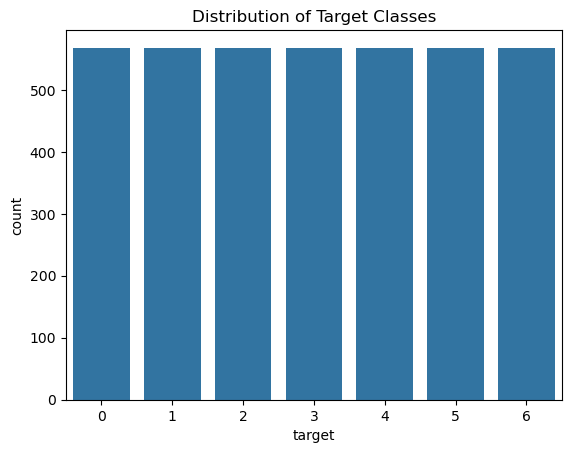

target
3    568
4    568
1    568
5    568
0    568
6    568
2    568
Name: count, dtype: int64


In [9]:

sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.show()


print(df['target'].value_counts())


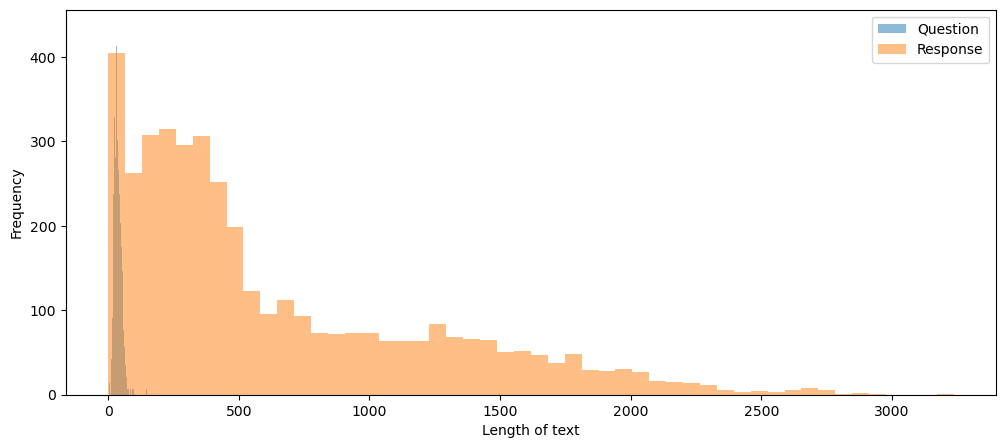

In [10]:

df['question_length'] = df['Question'].apply(len)
df['response_length'] = df['Response'].apply(len)


plt.figure(figsize=(12, 5))
plt.hist(df['question_length'], bins=50, alpha=0.5, label='Question')
plt.hist(df['response_length'], bins=50, alpha=0.5, label='Response')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [11]:
from collections import Counter
from nltk.tokenize import word_tokenize


def count_words(text_column):
    word_counts = Counter()
    for text in text_column:
        tokens = word_tokenize(text)
        word_counts.update(tokens)
    return word_counts


question_word_counts = count_words(df['Question'])
response_word_counts = count_words(df['Response'])


print(question_word_counts.most_common(20))
print(response_word_counts.most_common(20))


[('.', 1260), ('explain', 322), ('describe', 301), ('difference', 238), ('concept', 231), ('cause', 210), ('could', 203), ('process', 168), ('role', 154), ('indicative', 133), ('find', 126), ('purpose', 119), ('(', 119), (')', 119), ('pain', 112), ('=', 112), ('+', 112), ('1', 112), ('provide', 105), ('different', 98)]
[('.', 24610), (')', 5428), ('(', 5232), ('*', 4167), ('data', 1819), ('-', 1432), ('process', 1317), ('=', 1294), ('also', 1174), ('help', 1073), ('one', 1067), ('like', 1041), ('system', 988), ('1', 983), ('time', 967), ('cell', 967), ('cause', 901), ('may', 893), ('new', 889), ('use', 829)]


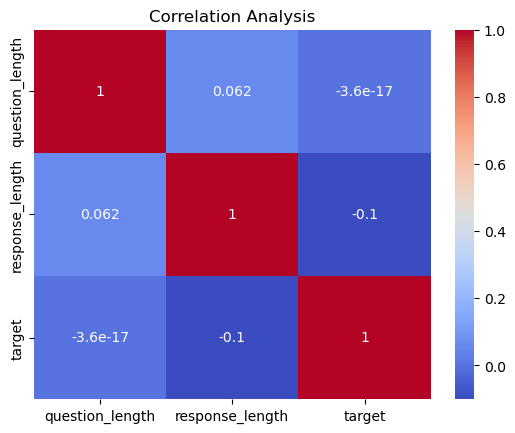

In [12]:

correlation_matrix = df[['question_length', 'response_length', 'target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


In [13]:
from textblob import TextBlob

df['question_sentiment'] = df['Question'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['response_sentiment'] = df['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000) 
question_tfidf = tfidf.fit_transform(df['Question'])
response_tfidf = tfidf.fit_transform(df['Response'])


In [15]:
from scipy.sparse import hstack

features = hstack([question_tfidf, response_tfidf, df[['question_length', 'response_length', 'question_sentiment', 'response_sentiment']].values])


In [16]:
test_df = pd.read_csv('test.csv')
test_df['Question'] = test_df['Question'].apply(clean_text_nltk)
test_df['Response'] = test_df['Response'].apply(clean_text_nltk)
test_df['question_length'] = test_df['Question'].apply(len)
test_df['response_length'] = test_df['Response'].apply(len)
test_df['question_sentiment'] = test_df['Question'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
test_df['response_sentiment'] = test_df['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


test_df.head()

,id,Question,Response,question_length,response_length,question_sentiment,response_sentiment
0,0,multiply 13 7 .,multiplying 13 7 give result 64.therefore answ...,15,62,0.000000,0.000000
1,1,main protagonist hundred year war,important character war include * king henry v...,33,305,0.166667,0.400000
2,2,importance truman doctrine,truman doctrine also known united state involv...,26,450,0.000000,-0.144444
3,3,film feature character named jack skellington,nightmare christmas,45,19,0.000000,0.000000
4,4,component cytoskeleton,cytoskeleton provides framework cell internal ...,22,1341,0.000000,0.028571


In [17]:
question_tfidf_test = tfidf.transform(test_df['Question'])
response_tfidf_test = tfidf.transform(test_df['Response'])


In [18]:
test_features = hstack([question_tfidf_test, response_tfidf_test, test_df[['question_length', 'response_length', 'question_sentiment', 'response_sentiment']].values])


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y_train = df['target']
X_train = df.drop(['target'], axis=1)



In [20]:
logreg = LogisticRegression(max_iter=10000, random_state=30)
logreg.fit(features, y_train)


LogisticRegression(max_iter=10000, random_state=30)

In [21]:
test_predictions = logreg.predict(test_features)

In [22]:
test_predictions

array([0, 5, 2, ..., 2, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, log_loss

test_probabilities = logreg.predict_proba(test_features)

In [24]:
test_probabilities

array([[0.5431884 , 0.00975814, 0.03713044, ..., 0.04186907, 0.33320059,
        0.02581842],
       [0.17758603, 0.06797085, 0.10900534, ..., 0.243729  , 0.256681  ,
        0.12331573],
       [0.11150309, 0.0902038 , 0.21767591, ..., 0.14490299, 0.2171118 ,
        0.14173732],
       ...,
       [0.14261939, 0.18871646, 0.28212644, ..., 0.13042379, 0.03979581,
        0.13609877],
       [0.24719123, 0.04991174, 0.14817091, ..., 0.23664959, 0.13227368,
        0.13377606],
       [0.06906247, 0.3224373 , 0.13015807, ..., 0.0417388 , 0.17055398,
        0.10512794]])

In [25]:

probabilities_df = pd.DataFrame(test_probabilities, columns=['target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6'])
probabilities_df['id'] = range(0, len(probabilities_df))
probabilities_df = probabilities_df[['id', 'target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6']]
probabilities_df.to_csv('test_probabilities.csv', index=False)

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=10)  # You can set parameters like max_depth here
decision_tree.fit(features, y_train)


DecisionTreeClassifier(random_state=10)

In [27]:

dt_test_predictions = decision_tree.predict(test_features)
dt_test_probabilities = decision_tree.predict_proba(test_features)


from sklearn.metrics import accuracy_score, classification_report, log_loss

test_probabilities_dt = decision_tree.predict_proba(test_features)



In [28]:

dt_probabilities_df = pd.DataFrame(test_probabilities_dt, columns=['target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6'])
dt_probabilities_df['id'] = range(0, len(probabilities_df))
dt_probabilities_df = probabilities_df[['id', 'target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6']]
dt_probabilities_df.to_csv('dt_test_probabilities.csv', index=False)

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200, random_state=0)
random_forest.fit(features, y_train)
rf_test_predictions = random_forest.predict(test_features)
rf_test_probabilities = random_forest.predict_proba(test_features)

In [30]:

rf_probabilities_df = pd.DataFrame(rf_test_probabilities, columns=['target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6'])
rf_probabilities_df['id'] = range(0, len(probabilities_df))
dt_probabilities_df = probabilities_df[['id', 'target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6']]
rf_probabilities_df.to_csv('rf_test_probabilities.csv', index=False)

## Gradient Boosting machine (XGBoost)

In [31]:
import xgboost as xgb
dtrain = xgb.DMatrix(features, label=y_train)
dtest = xgb.DMatrix(test_features)


In [32]:
num_classes = df['target'].nunique()

params = {
    'max_depth': 8,  
    'eta': 0.1,      
    'objective': 'multi:softprob',  
    'num_class': num_classes,
    'eval_metric': 'logloss' 
}
num_rounds = 200  


bst = xgb.train(params, dtrain, num_rounds)


In [33]:
xgb_test_probabilities = bst.predict(dtest)
probabilities_df_xgb = pd.DataFrame(xgb_test_probabilities, columns=[f'target_{i}' for i in range(num_classes)])
probabilities_df_xgb['id'] = range(0, len(probabilities_df_xgb))

probabilities_df_xgb = probabilities_df_xgb[['id'] + [f'target_{i}' for i in range(num_classes)]]
probabilities_df_xgb.to_csv('xgboost_test_probabilities.csv', index=False)


## SVM

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100] 
}
svm_model = SVC(probability=True)
clf = GridSearchCV(svm_model, parameters, cv=5, scoring='neg_log_loss')
clf.fit(features, y_train)
test_predictions_svm = svm_model.predict(test_features)
test_probabilities_svm = svm_model.predict_proba(test_features)

In [35]:

svm_probabilities_df = pd.DataFrame(test_probabilities_svm, columns=['target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6'])
svm_probabilities_df['id'] = range(0, len(svm_probabilities_df))
svm_probabilities_df = probabilities_df[['id', 'target_0', 'target_1',
                                                             'target_2','target_3', 'target_4',
                                                             'target_5','target_6']]
svm_probabilities_df.to_csv('svm_test_probabilities.csv', index=False)